In [ ]:
# eps = [0.09,0.0925,0.095,0.0975,0.1,0.1025,0.1050,0.1075,0.11]
# dep_s_train = [0.0936,0.0958,0.0961, 0.0968,0.0998,0.1046, 0.1071, 0.10758, 0.1079]
# dep_s_test =  [0.0935,0.0958,0.0960, 0.0967,0.0996,0.1044, 0.1069, 0.10723, 0.10753]

# dep_y_train = [0.2098, 0.2131, 0.2157, 0.2187, 0.2217, 0.2239, 0.2259, 0.2244, 0.2238]
# dep_y_test = [0.2089, 0.2124, 0.2150, 0.2180, 0.2210, 0.2232, 0.2251, 0.2236, 0.2230]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json


In [2]:
keropt = open("results/results_opt/Gaussian-Kernel/Full_Range/kernel.txt", "r")
dataopt = keropt.read()
lopt = dataopt.split('\n')

# tradeoff_invariant_representation_learning/results/results_opt/Gaussian-Kernel/Full_Range/kernel.txt

In [3]:
kernoopt = open("results/results_noopt/Gaussian-Kernel/Full_Range/kernel.txt", "r")
datanoopt = kernoopt.read()
lnoopt = datanoopt.split('\n')

In [4]:
keroptnb = open("results/results_opt_new_barrier/Gaussian-Kernel/Full_Range/kernel.txt", "r")
dataoptnb = keroptnb.read()
loptnb = dataoptnb.split('\n')

In [5]:
dep_s_opt = np.zeros(100)
dep_y_opt = np.zeros(100)
k = 0
for i in range(200):
    res = json.loads(lopt[i])
    if 'test_test_dep_s' not in res:
        continue
    else:
        dep_s_opt[k] = res['test_test_dep_s']
        dep_y_opt[k] = res['test_test_dep_y']
        k = k+1
        


In [6]:
dep_s_noopt = np.zeros(100)
dep_y_noopt = np.zeros(100)
k = 0
for i in range(200):
    res = json.loads(lnoopt[i])
    if 'test_test_dep_s' not in res:
        continue
    else:
        dep_s_noopt[k] = res['test_test_dep_s']
        dep_y_noopt[k] = res['test_test_dep_y']
        k = k+1

In [7]:
dep_s_optnb = np.zeros(100)
dep_y_optnb = np.zeros(100)
k = 0
for i in range(200):
    res = json.loads(loptnb[i])
    if 'test_test_dep_s' not in res:
        continue
    else:
        dep_s_optnb[k] = res['test_test_dep_s']
        dep_y_optnb[k] = res['test_test_dep_y']
        k = k+1

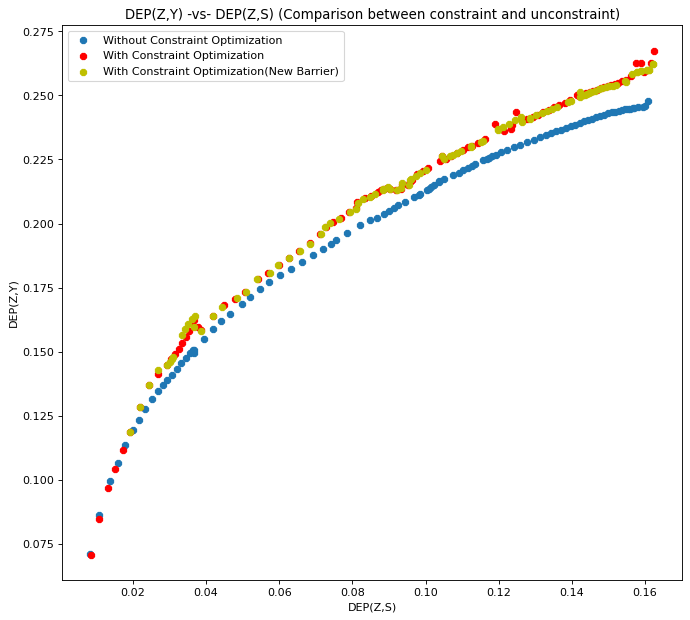

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(10, 9), dpi=80)
# from matplotlib import rc
# rc('text', usetex=True)plt.scatter(ft4c_dpv_depnoopt, ft4c_acc_depnoopt, color='y', label = 'Without Constraint Optimization')
or = 'y', label = 'With Constraint Optimization(New Barrier)')

plt.legend()
plt.xlabel('DEP(Z,S)')
plt.ylabel('DEP(Z,Y)')
plt.title('DEP(Z,Y) -vs- DEP(Z,S) (Comparison between constraint and unconstraint)')
plt.show()

In [13]:
dep_y_opt[71]

0.1805286407470703

In [14]:
kcc_s_opt = np.zeros(100)
acc_opt = np.zeros(100)
k = 0
for i in range(200):
    res = json.loads(lopt[i])
    if 'test_test_dep_s' not in res:
        continue
    else:
        kcc_s_opt[k] = res['test_test_kcc_s']
        acc_opt[k] = res['test_acc']
        k = k+1
        

In [15]:
kcc_s_noopt = np.zeros(100)
acc_noopt = np.zeros(100)
k = 0
for i in range(200):
    res = json.loads(lnoopt[i])
    if 'test_test_dep_s' not in res:
        continue
    else:
        kcc_s_noopt[k] = res['test_test_kcc_s']
        acc_noopt[k] = res['test_acc']
        k = k+1
        

In [16]:
kcc_s_optnb = np.zeros(100)
acc_optnb = np.zeros(100)
k = 0
for i in range(200):
    res = json.loads(loptnb[i])
    if 'test_test_dep_s' not in res:
        continue
    else:
        kcc_s_optnb[k] = res['test_test_kcc_s']
        acc_optnb[k] = res['test_acc']
        k = k+1
        

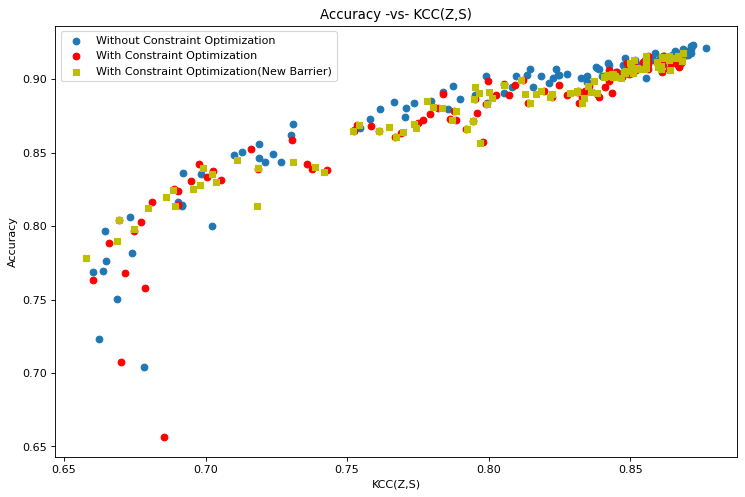

In [27]:
from matplotlib.pyplot import figure
figure(figsize=(11, 7), dpi=80)
plt.scatter(kcc_s_noopt, acc_noopt, label = 'Without Constraint Optimization')
plt.scatter(kcc_s_opt, acc_opt, color = 'r', label = 'With Constraint Optimization')
plt.scatter(kcc_s_optnb, acc_optnb, color = 'y', marker = 's', label = 'With Constraint Optimization(New Barrier)')

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('KCC(Z,S)')
plt.title('Accuracy -vs- KCC(Z,S)')
plt.show()

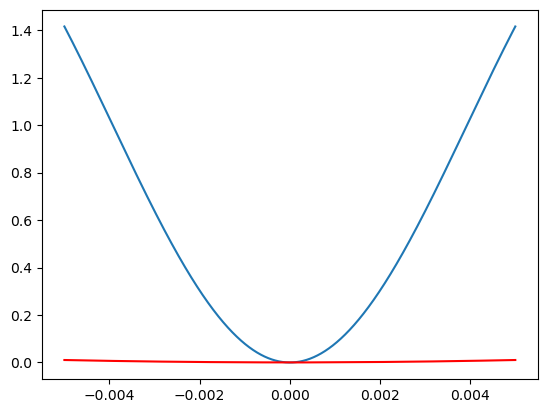

In [21]:
import numpy as np
import math
def barrier_func_sq_tol(delta, gamma, w):
    if (w > delta) or (w < -delta):
        return (gamma * math.pow(w,2))/(2*delta) + (gamma * delta)/2
    else:
        return gamma*abs(w)

def barrier_func_cos(kappa, w):
    if w < (-np.pi/kappa) or w > (np.pi/kappa):
        # print(w)
        # print(np.pi/kappa)
        return 2
    else:
        return 1 - np.cos(kappa*w)


delta = 0.001
gamma = 0.8

kappa = 400
w = np.linspace(-0.005,0.005,5000)
y = np.zeros(5000)
y2= np.zeros(5000)
for i in range(5000):
    y[i] = barrier_func_cos(kappa, w[i])
    y2[i] = barrier_func_sq_tol(delta, gamma, w[i])

plt.plot(w,y)
plt.plot(w,y2, color = 'r')


In [2]:
import pickle

fruits = ["Orange", "Banana", "Kiwi"]
with open('/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/example.pickle', 'wb') as f:
    pickle.dump(fruits, f)

In [4]:
import pickle

with open('/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/example.pickle', 'rb') as f:
    loaded_fruits = pickle.load(f)

print(loaded_fruits)

['Orange', 'Banana', 'Kiwi']


In [3]:
cbAopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/celebA_results_opt/celebA-kernel/Full_Range/test-log.txt", "r")
dcbAopt = cbAopt.read()
lcbAopt = dcbAopt.split('\n')

In [4]:
lcbAopt[0]

'{"random_seed": 0, "tau": 0.0, "test_DPV_var": 0.2026701658290206, "test_embedding_dim": 1, "test_tgt_loss": 0.29168570041656494, "test_tgt_acc": 0.8754132986068726}'

In [5]:
cba_dpv_opt = np.zeros(100)
cba_acc_opt = np.zeros(100)
k = 0
for i in range(100):
    res = json.loads(lcbAopt[i])
    cba_dpv_opt[k] = res["test_DPV_var"]
    cba_acc_opt[k] = res["test_tgt_acc"]
    k = k+1


In [6]:
cbAnoopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/celebA_results_noopt/celebA-kernel/Full_Range/test-log.txt", "r")
dcbAnoopt = cbAnoopt.read()
lcbAnoopt = dcbAnoopt.split('\n')

In [7]:
len(lcbAnoopt)


99

In [8]:
# cba_dpv_opt = np.zeros(100)
# cba_acc_opt = np.zeros(100)
# k = 0
cba_dpv_noopt = []
cba_acc_noopt = []
n = len(lcbAnoopt)
for i in range(n-1):
    res = json.loads(lcbAnoopt[i])
    cba_dpv_noopt.append(res["test_DPV_var"])
    cba_acc_noopt.append(res["test_tgt_acc"])
    # k = k+1


In [9]:
cbAdepopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/celebA_results_DEP_fr_opt/celebA-kernel/Full_Range/test-log.txt", "r")
dcbAdepopt = cbAdepopt.read()
lcbAdepopt = dcbAdepopt.split('\n')

In [10]:
len(lcbAdepopt)


86

In [11]:
# cba_dpv_opt = np.zeros(100)
# cba_acc_opt = np.zeros(100)
# k = 0
cba_dpv_depopt = []
cba_acc_depopt = []
n = len(lcbAdepopt)
for i in range(n-1):
    res = json.loads(lcbAdepopt[i])
    cba_dpv_depopt.append(res["test_DPV_var"])
    cba_acc_depopt.append(res["test_tgt_acc"])
    # k = k+1


Text(0, 0.5, 'Accuracy')

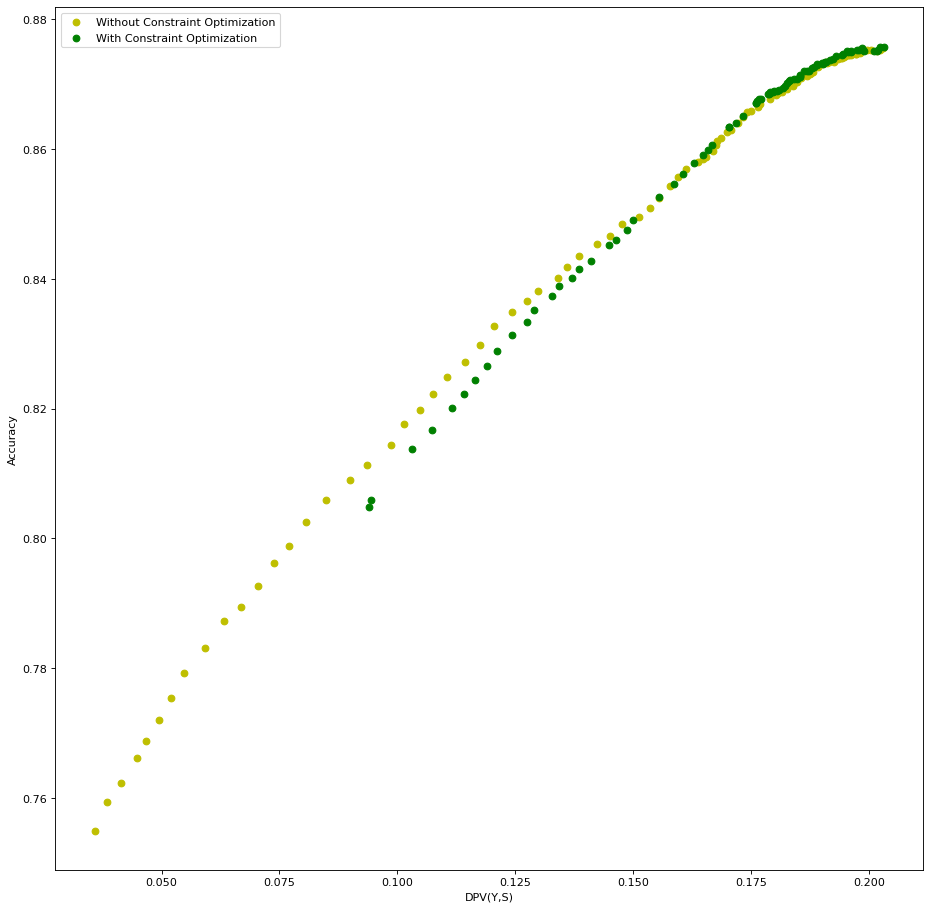

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(14, 14), dpi=80)
# plt.scatter(cba_dpv_opt, cba_acc_opt, marker='s', color = 'r', label = 'With Constraint Optimization')
plt.scatter(cba_dpv_noopt, cba_acc_noopt, color='y', label = 'Without Constraint Optimization')
plt.scatter(cba_dpv_depopt, cba_acc_depopt, color='g', label = 'With Constraint Optimization')

plt.legend()
plt.xlabel("DPV(Y,S)")
plt.ylabel("Accuracy")

# plt.scatter(kcc_s_opt, acc_opt, color = 'r', label = 'With Constraint Optimization')

In [13]:
tau = np.zeros(100)
k = 0

for i in range(85):
    res = json.loads(lcbAdepopt[i])
    tau[k] = res["tau"]
    k = k+1

In [14]:
taup = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for t in taup:
    if t in tau:
        continue
    else:
        print(t)

0.05
0.34
0.59
0.67
0.87
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


In [15]:
ftnoopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/folktables_results_noopt/folktables-kernel/Full_Range/test-log.txt", "r")
dftnoopt = ftnoopt.read()
lftnoopt = dftnoopt.split('\n')

In [16]:
tau = np.zeros(100)
k = 0

for i in range(100):
    res = json.loads(lftnoopt[i])
    tau[k] = res["tau"]
    k = k+1

In [17]:
taup = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
for t in taup:
    if t in tau:
        continue
    else:
        print(t)

0.72


In [18]:
ftnoopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/folktables_results_noopt/folktables-kernel/Full_Range/test-log.txt", "r")
dftnoopt = ftnoopt.read()
lftnoopt = dftnoopt.split('\n')

In [19]:
len(lftnoopt)


102

In [20]:
# cba_dpv_opt = np.zeros(100)
# cba_acc_opt = np.zeros(100)
# k = 0
ft_dpv_noopt = []
ft_acc_noopt = []
n = len(lftnoopt)
for i in range(n-1):
    res = json.loads(lftnoopt[i])
    ft_dpv_noopt.append(res["test_DPV_var"])
    ft_acc_noopt.append(res["test_tgt_acc"])
    # k = k+1


In [21]:
ftdepopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/folktables_results_DEP_opt/folktables-kernel/Full_Range/test-log.txt", "r")
dftdepopt = ftdepopt.read()
lftdepopt = dftdepopt.split('\n')

In [22]:
len(lftdepopt)


96

In [23]:
# cba_dpv_opt = np.zeros(100)
# cba_acc_opt = np.zeros(100)
# k = 0
ft_dpv_depopt = []
ft_acc_depopt = []
n = len(lftdepopt)
for i in range(n-1):
    res = json.loads(lftdepopt[i])
    ft_dpv_depopt.append(res["test_DPV_var"])
    ft_acc_depopt.append(res["test_tgt_acc"])
    # k = k+1


Text(0, 0.5, 'Accuracy')

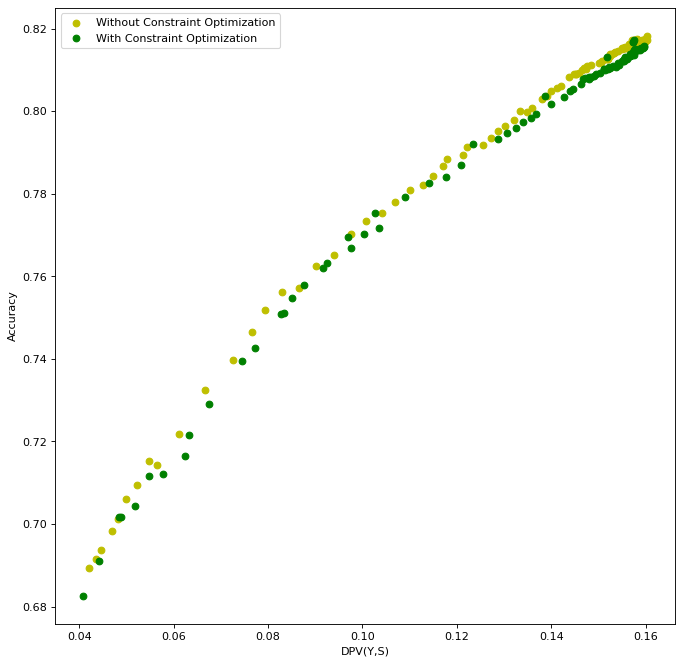

In [26]:
# ft_acc_depopt = ft_acc_depopt + 0.0
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
# plt.scatter(cba_dpv_opt, cba_acc_opt, marker='s', color = 'r', label = 'With Constraint Optimization')
plt.scatter(ft_dpv_noopt, ft_acc_noopt, color='y', label = 'Without Constraint Optimization')
plt.scatter(ft_dpv_depopt, ft_acc_depopt, color='g', label = 'With Constraint Optimization')

plt.legend()
plt.xlabel("DPV(Y,S)")
plt.ylabel("Accuracy")

In [27]:
ft4cdepnoopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/folktables_4c_results_DEP_noopt/folktables-kernel/Full_Range/test-log.txt", "r")
dft4cdepnoopt = ft4cdepnoopt.read()
lft4cdepnoopt = dft4cdepnoopt.split('\n')

In [28]:
len(lft4cdepnoopt)


96

In [29]:
# cba_dpv_opt = np.zeros(100)
# cba_acc_opt = np.zeros(100)
# k = 0
ft4c_dpv_depnoopt = []
ft4c_acc_depnoopt = []
n = len(lft4cdepnoopt)
for i in range(n-1):
    res = json.loads(lft4cdepnoopt[i])
    ft4c_dpv_depnoopt.append(res["test_DPV_var"])
    ft4c_acc_depnoopt.append(res["test_tgt_acc"])
    # k = k+1


In [48]:
ft4cdepopt = open("/home/adarsh/Desktop/HAL_Adarsh/tradeoff_invariant_representation_learning/results/folktables_4c_results_DEP_opt_new/folktables-kernel/Full_Range/test-log.txt", "r")
dft4cdepopt = ft4cdepopt.read()
lft4cdepopt = dft4cdepopt.split('\n')

In [49]:
len(lft4cdepopt)


96

In [50]:
# cba_dpv_opt = np.zeros(100)
# cba_acc_opt = np.zeros(100)
# k = 0
ft4c_dpv_depopt = []
ft4c_acc_depopt = []
n = len(lft4cdepopt)
for i in range(n-1):
    res = json.loads(lft4cdepopt[i])
    ft4c_dpv_depopt.append(res["test_DPV_var"])
    ft4c_acc_depopt.append(res["test_tgt_acc"])
    # k = k+1


Text(0, 0.5, 'Accuracy')

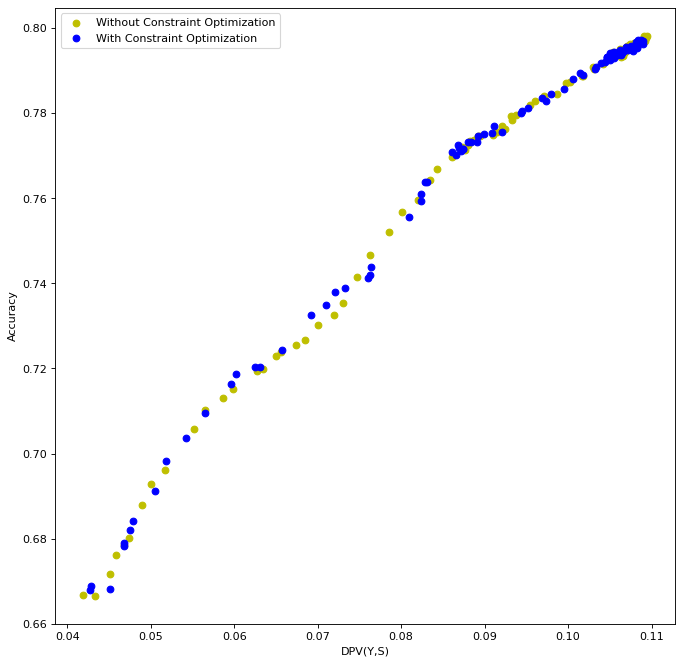

In [51]:
# ft_acc_depopt = ft_acc_depopt + 0.0
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
# plt.scatter(cba_dpv_opt, cba_acc_opt, marker='s', color = 'r', label = 'With Constraint Optimization')
plt.scatter(ft4c_dpv_depnoopt, ft4c_acc_depnoopt, color='y', label = 'Without Constraint Optimization')
plt.scatter(ft4c_dpv_depopt, ft4c_acc_depopt, color='b', label = 'With Constraint Optimization')

# plt.scatter(ft_dpv_depopt, ft_acc_depopt, color='g', label = 'With Constraint Optimization')

plt.legend()
plt.xlabel("DPV(Y,S)")
plt.ylabel("Accuracy")